In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [8, 6]


## 1) Clustering for dataset exploration


### How to make a dataset for clustering?

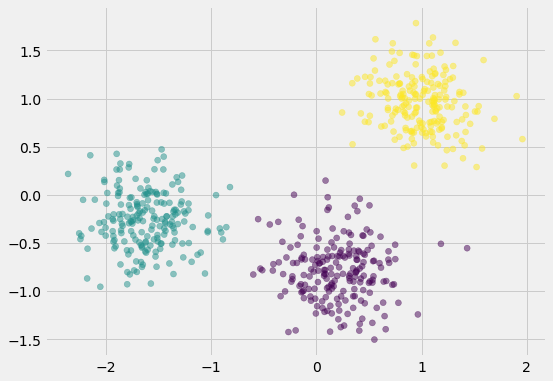

In [26]:
from sklearn.datasets.samples_generator import make_blobs

#gen 2d dataset
centers = [[0.2,-0.8],[-1.6,-0.2],[1.0,0.98]]
X,y = make_blobs(n_samples=600,centers=centers,n_features=2,cluster_std=0.3,random_state=2)

# Assign the columns of new_points: xs and ys
xs = X[:,0]
ys = X[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=y,alpha=0.5)

# Assign the cluster centers: centroids
#centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
#centroids_x = centroids[:,0]
#centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
#plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

### How many clusters to use?
Use seeds dataset:
- https://archive.ics.uci.edu/ml/datasets/seeds

In [27]:
columns = ['area','perimeter','compactness','length','width','asymmetry','length_grove','type']
df = pd.read_csv("D:\\ml_code\\datasets\\unsupervised\\seeds.csv",header=None,names=columns)
display(df.head())
#get samples into numpy - minus the label
samples = df.iloc[:,:7].values


,area,perimeter,compactness,length,width,asymmetry,length_grove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Inertia measure cluster quality - how spread out the clusters are(lower the better).  Formally the distance of each sample to centroid of its cluster.  Choose 'elbow' where inertia begins to decrease more slowly

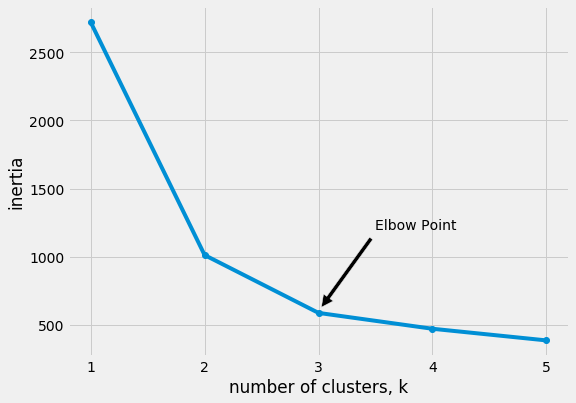

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
from sklearn.cluster import KMeans
ks = list(range(1,6))

inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)
# Plot ks vs inertias
ax.plot(ks, inertias, '-o')
ax.set_xlabel('number of clusters, k')
ax.set_ylabel('inertia')
ax.set_xticks(ks);
ax.annotate('Elbow Point',xy=(3,600),xytext=(3.5,1200),arrowprops=dict(facecolor='black',shrink=0.05));

Looks like 3 would be a good cluster number for this data

### Evaluating the grain clustering
The grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". Cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

In [29]:
df = df.replace({"type":{1:"Kama_wheat",2:"Rosa_wheat",3:"Canadian_wheat"}})
df.head()
varieties = df.type.values

In [30]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df.varieties)

# Display ct
print(ct)

varieties  Canadian_wheat  Kama_wheat  Rosa_wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


Seperation is good - but can be better.  Can also use a heatmap with crosstab function

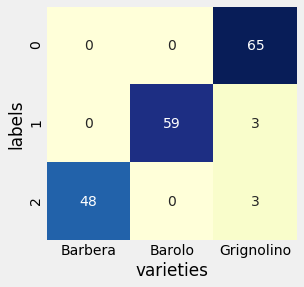

In [41]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.heatmap(pd.crosstab(df['labels'], df.varieties),cmap="YlGnBu", annot=True, cbar=False);

### Datasets with more variance
Datasets with higher levels of variance will be harder to define using clusters.  Piedmont wines dataset.  178 samples from 3 distince varieties

In [42]:
wines_df = pd.read_csv("D:\\ml_code\\datasets\\unsupervised\\wine.csv")
wines_df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
#Some features of wines dataset have high variance such as malic_acid
wines_df.describe().T

,count,mean,std,min,25%,50%,75%,max
class_label,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [44]:
varieties = wines_df.class_name
samples = wines_df.iloc[:,2:]
samples.shape

(178, 13)

In [45]:
#generate cluster labels
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'],df.varieties)
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               29      13          20
1                0      46           1
2               19       0          50


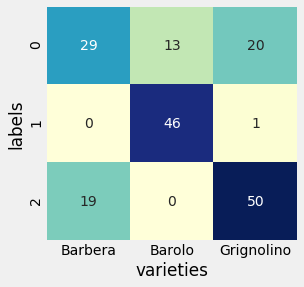

In [46]:
sns.heatmap(pd.crosstab(df['labels'], df.varieties),cmap="YlGnBu", annot=True, cbar=False);

This time results are worse, because of variance of the dataset.  Need to scale the data so have mean of 0 and variance of 1.

In [47]:
from sklearn.preprocessing import StandardScaler

#use standard scaler
sc = StandardScaler()
samples = wines_df.iloc[:,2:]
samples = sc.fit_transform(samples)

#generate cluster labels
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'],df.varieties)
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0       0          65
1                0      59           3
2               48       0           3


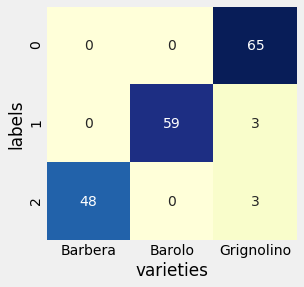

In [48]:
sns.heatmap(pd.crosstab(df['labels'], df.varieties),cmap="YlGnBu", annot=True, cbar=False);

## 2) Visualization with hierarchical clustering and t-SNE
Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

Want to visualise dendrogram of grains dataset.  Will reduce size so easier to visualise

In [56]:
columns = ['area','perimeter','compactness','length','width','asymmetry','length_grove','type']
grains_df = pd.read_csv("D:\\ml_code\\datasets\\unsupervised\\seeds.csv",header=None,names=columns)

grains_sub_df = grains_df.sample(n=40)
#display(grains_sub_df.head())
grains_sub_df = grains_sub_df.replace({"type":{1:"Kama_wheat",2:"Rosa_wheat",3:"Canadian_wheat"}})
grains_sub_df.head()
varieties = grains_sub_df.type.values

#get samples into numpy - minus the label
samples = grains_sub_df.iloc[:,:7].values

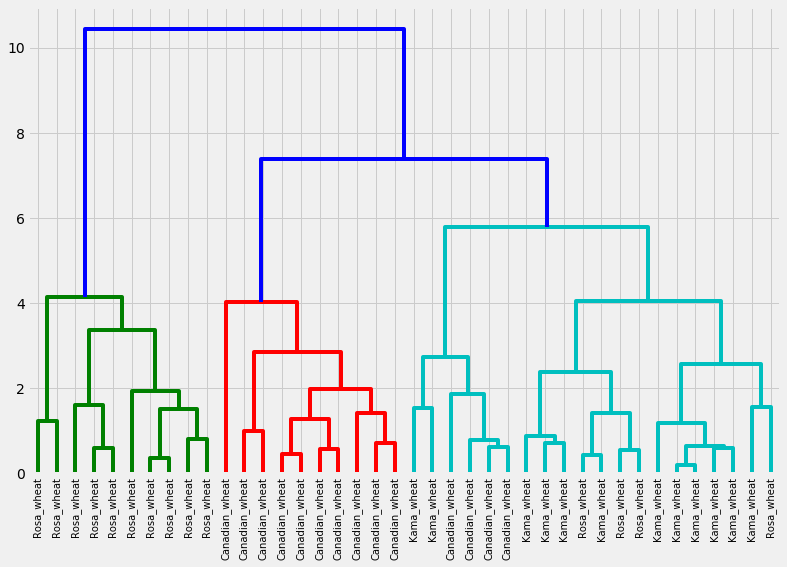

In [64]:
plt.rcParams['figure.figsize'] = [12, 8]

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

### Apply t-SNE to dataset

In [76]:
#make snaller for viewing
grains_sub_df = grains_df.sample(n=200)

#will use to colour the plot
var_numbers = list(grains_sub_df.type.values)

grains_sub_df = grains_sub_df.replace({"type":{1:"Kama_wheat",2:"Rosa_wheat",3:"Canadian_wheat"}})
grains_sub_df.head()
varieties = grains_sub_df.type.values

#get samples into numpy - minus the label
samples = grains_sub_df.iloc[:,:7].values

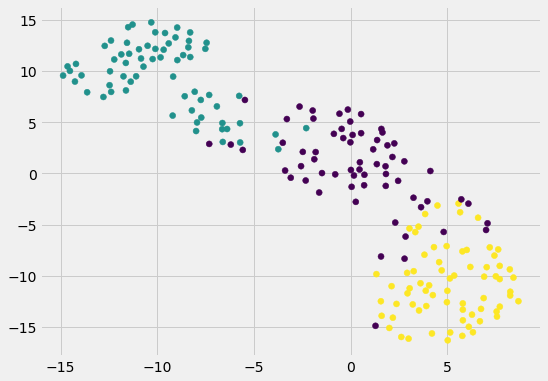

In [82]:
from sklearn.manifold import TSNE
fig, ax = plt.subplots(figsize=(8,6))

model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]
# Select the 1st feature: ys
ys = tsne_features[:,1]

ax.scatter(xs,ys,c=var_numbers);

The t-SNE visualization manages to separate the 3 varieties of grain samples.

## 3) Decorrelating data and dimension reduction

### Investigate correlation before and after applying PCA


In [109]:
#Look at correlation of width and height
columns = ['width','length']
grains_w_l_df = pd.read_csv("D:\\ml_code\\datasets\\unsupervised\\seeds-width-vs-length.csv",header=None,names=columns)
grains = grains_w_l_df.values

from sklearn.decomposition import PCA
from scipy.stats import pearsonr 

# Assign the 0th column of grains: width
width = grains[:,0]
# Assign the 1st column of grains: length
length = grains[:,1]

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print("Correlation coef is: {}".format(correlation))

# Create PCA instance: model
model = PCA()
# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)
# Assign 0th column of pca_features: xs
xs = pca_features[:,0]
# Assign 1st column of pca_features: ys
ys = pca_features[:,1]


Correlation coef is: 0.8604149377143467


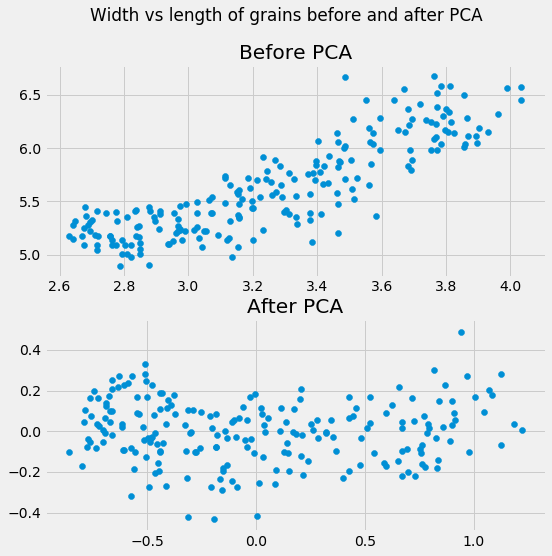

In [118]:
plt.rcParams['figure.figsize'] = [8, 8]
f, (ax1, ax2) = plt.subplots(2, 1)
f.suptitle('Width vs length of grains before and after PCA')
ax1.scatter(width, length)
ax1.set_title("Before PCA")
ax2.scatter(xs, ys)
ax2.set_title("After PCA");

Have successfully decorrelated the dataset

NameError: name 'pca_features' is not defined